# **Install Control Module**

In [1]:
!pip install control

In [2]:
!pip install slycot

     |████████████████████████████████| 1.5 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for slycot: filename=slycot-0.4.0-cp37-cp37m-linux_x86_64.whl size=1417933 sha256=d571cbb30fe130a0f700c48913fdc3e3686704529b9faebe7e20ef91da2a6ef9
  Stored in directory: /root/.cache/pip/wheels/fa/b2/19/1e6568896fbabaf2a03d2fb6575211d281afcb9e00ce026cf6
Successfully built slycot


# **Cruise Control: System Modeling**

Source: https://ctms.engin.umich.edu/CTMS/index.php?example=CruiseControl&section=SystemModeling

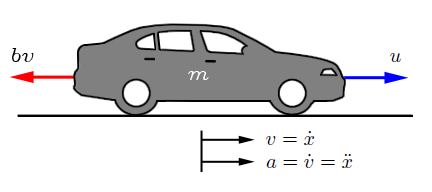

- (m)   vehicle mass          1000 kg
- (b)   damping coefficient   50 N.s/m
- (u)   nominal control force   500 N

image.png

image.png

## **State Space Model**

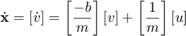

image.png

In [3]:
import numpy as np
import control as ct

In [4]:
#parameter
m = 1000
b = 50

In [5]:
A = np.array([[-b/m]])
B = np.array([[1/m]])
C = np.array([[1]])
D = np.array([[0]])

SS_cruise = ct.ss(A, B, C, D)

print('State Space Model\n', SS_cruise)

State Space Model
 A = [[-0.05]]

B = [[0.001]]

C = [[1.]]

D = [[0.]]



## **Transfer function model**

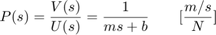

In [6]:
s = ct.tf('s')

TF_cruise = 1/(m*s+b)

print('Transfer Function Model\n', TF_cruise)

Transfer Function Model
 
     1
-----------
1000 s + 50



## **Open-loop step response**

### **Transfer Function Model**

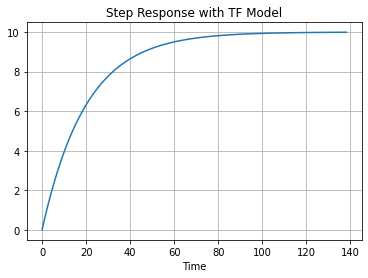

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

u = 500

t,y = ct.step_response(u*TF_cruise)

plt.plot(t,y)
plt.grid()
plt.xlabel('Time')
plt.title('Step Response with TF Model')
plt.show()

### **State Space Model**

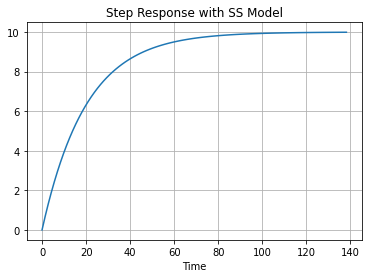

In [8]:
t,y = ct.step_response(u*SS_cruise)

plt.plot(t,y)
plt.grid()
plt.xlabel('Time')
plt.title('Step Response with SS Model')
plt.show()

# **DC Motor Speed: System Modeling**

Source: https://ctms.engin.umich.edu/CTMS/index.php?example=MotorSpeed&section=SystemModeling

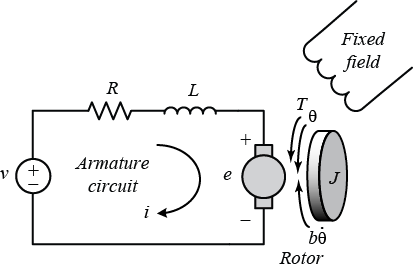

- (J)     moment of inertia of the rotor     0.01 kg.m^2
- (b)     motor viscous friction constant    0.1 N.m.s
- (Ke)    electromotive force constant       0.01 V/rad/sec
- (Kt)    motor torque constant              0.01 N.m/Amp
- (R)     electric resistance                1 Ohm
- (L)     electric inductance                0.5 H

image.png

image.png

image.png

image.png

## **Transfer Function Model**

image.png

image.png

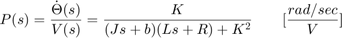

In [9]:
s = ct.tf('s')

J = 0.01
b = 0.1
K = 0.01
R = 1
L = 0.5

TF_motorspeed = K/((J*s+b)*(L*s+R)+K**2)

print('Transfer Function Model\n', TF_motorspeed)

Transfer Function Model
 
           0.01
---------------------------
0.005 s^2 + 0.06 s + 0.1001



## **State Space Model**

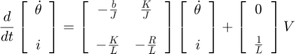

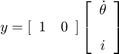

In [10]:
A = np.array([[-b/J, K/J],[-K/L, -R/L]])
B = np.array([[0], [1/L]])
C = np.array([[1, 0]])
D = np.array([[0]])

SS_motorspeed = ct.ss(A, B, C, D)

print('State Space Model\n', SS_motorspeed)

State Space Model
 A = [[-10.     1.  ]
     [ -0.02  -2.  ]]

B = [[0.]
     [2.]]

C = [[1. 0.]]

D = [[0.]]



## **Open-loop response**

### **Transfer Function Model**

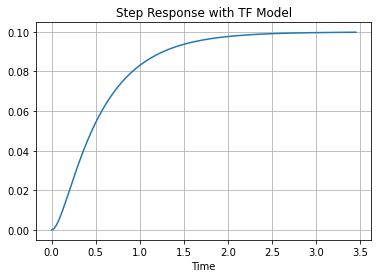

In [11]:
t,y = ct.step_response(TF_motorspeed)

plt.plot(t,y)
plt.grid()
plt.xlabel('Time')
plt.title('Step Response with TF Model')
plt.show()

## **State Space Model**

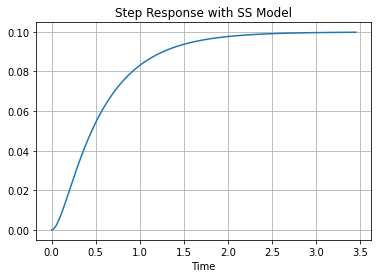

In [12]:
t,y = ct.step_response(SS_motorspeed)

plt.plot(t,y)
plt.grid()
plt.xlabel('Time')
plt.title('Step Response with SS Model')
plt.show()

# **LR Circuit**

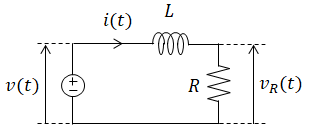

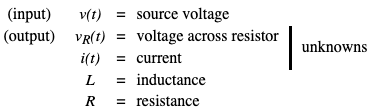

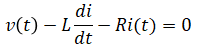

image.png

## **Transfer Function Model**

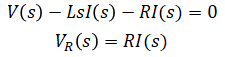

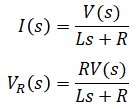

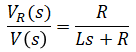

## **Block Diagram**

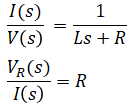

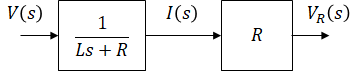

In [13]:
s = ct.tf('s')

L = 0.1 #H
R = 20 #ohm

TF_circuit = R/(L*s+R)

print('Transfer Function Model\n', TF_circuit)

Transfer Function Model
 
    20
----------
0.1 s + 20



## **State Space Model**

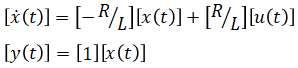

In [14]:
A = np.array([[-R/L]])
B = np.array([[R/L]])
C = np.array([[1]])
D = np.array([[0]])

SS_circuit = ct.ss(A, B, C, D)

print('State Space Model\n', SS_circuit)

State Space Model
 A = [[-200.]]

B = [[200.]]

C = [[1.]]

D = [[0.]]



## **Open-loop response**

### **Transfer Function Model**

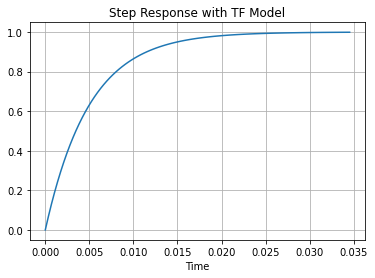

In [15]:
t,y = ct.step_response(TF_circuit) #1V

plt.plot(t,y)
plt.grid()
plt.xlabel('Time')
plt.title('Step Response with TF Model')
plt.show()

### **State Space Model**

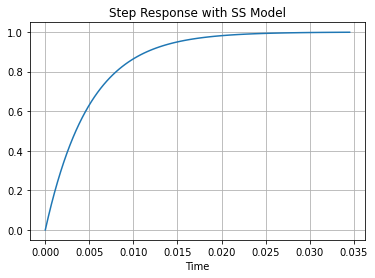

In [16]:
t,y = ct.step_response(SS_circuit)

plt.plot(t,y)
plt.grid()
plt.xlabel('Time')
plt.title('Step Response with SS Model')
plt.show()

# **Assignment**

Get the mathematical model (transfer function and state space model) and give step input to that model

## **1. RLC Circuit**

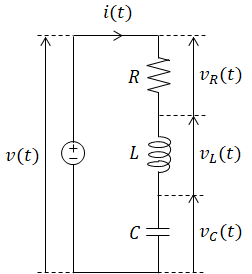

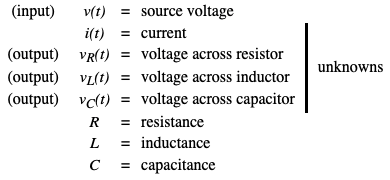

Parameter:
- R = 47 Ohm
- L = 100 mH
- C = 220 uF

## **2. Quadrotor 1D**

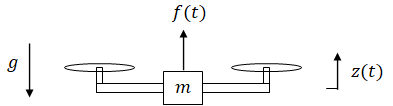

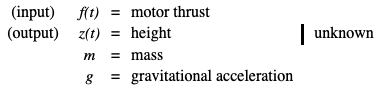

Parameter:
- m = 180 Gr
- g = 9.81 m/s^2